# Исследование сервиса аренды самокатов GoFast
Я аналитик популярного сервиса аренды самокатов GoFast. Мне передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Задача: проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти. Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
- без подписки
  - абонентская плата отсутствует;
  - стоимость одной минуты поездки — 8 рублей;
  - стоимость старта (начала поездки) — 50 рублей;
- с подпиской Ultra
  - абонентская плата — 199 рублей в месяц; 
  - стоимость одной минуты поездки — 6 рублей; 
  - стоимость старта — бесплатно.

# Описание данных
В основных данных есть информация о пользователях, их поездках и подписках.
- Пользователи - users_go.csv
  - user_id	- уникальный идентификатор пользователя
  - name - имя пользователя
  - age - возраст
  - city - город
  - subscription_type - тип подписки (free, ultra)
- Поездки - rides_go.csv
  - user_id	- уникальный идентификатор пользователя
  - name - имя пользователя
  - distance - расстояние, которое пользователь проехал в текущей сессии (в метрах)
  - duration - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
  - date - дата совершения поездки
- Подписки - subscriptions_go.csv
  - subscription_type - тип подписки
  - minute_price - стоимость одной минуты поездки по данной подписке
  - start_ride_price - стоимость начала поездки
  - subscription_fee - стоимость ежемесячного платежа

##### Шаг 6. Проверка гипотез
Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.
  - 6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.
  - 6.2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.
  - 6.3 Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.
  - 6.4 Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

#### Шаг 1. Загрузка данных

In [6]:
users = pd.read_csv('users_go.csv')
rides = pd.read_csv('rides_go.csv')
subscriptions = pd.read_csv('subscriptions_go.csv')

In [7]:
display(users.head())

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [8]:
display(subscriptions)

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [9]:
display(rides.head())

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [10]:
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%d')

In [11]:
rides.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [12]:
display(users.info())
display(rides.info())
subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes


В данных пропусков не наблюдается. Все типы приведены правильно.

#### Шаг 2. Предобработка данных

In [13]:
rides['date'].max() - rides['date'].min()

Timedelta('363 days 00:00:00')

Данные даны за 1 год. Каждый месяц соостетствует своему в определенному году.

In [14]:
rides['month'] = rides['date'].dt.month

In [15]:
rides.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


Исходя из информации о таблицах - пропущенных значений нет. Посмотрим на дубликаты:

In [16]:
users.duplicated().sum()

31

In [17]:
rides.duplicated().sum()

0

Удалим дубликаты в users, т.к. они могут плохо повлиять на анализ данных. В rides нет дубликатов.

In [18]:
users = users.drop_duplicates()

#### Шаг 3. Исследовательский анализ данных

##### Частота встречаемости городов:

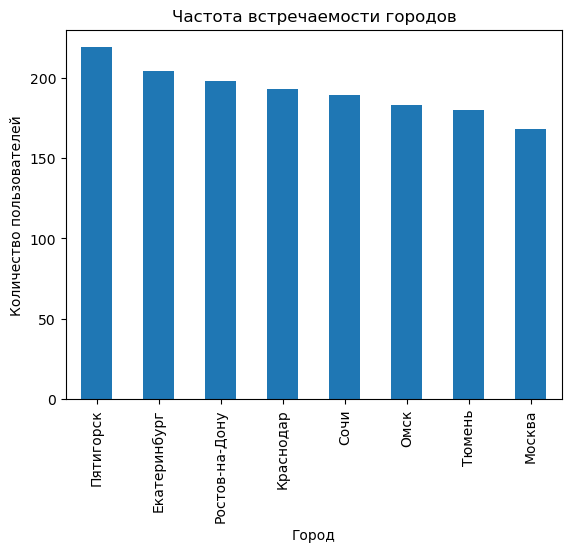

In [19]:
users['city'].value_counts().plot(kind='bar',
                                 title = 'Частота встречаемости городов',
                                 xlabel = 'Город',
                                 ylabel = 'Количество пользователей');

Самый частовстречающийся город - Пятигорск, реже всего - Москва.

##### Соотношение пользователей с подпиской и без подписки:

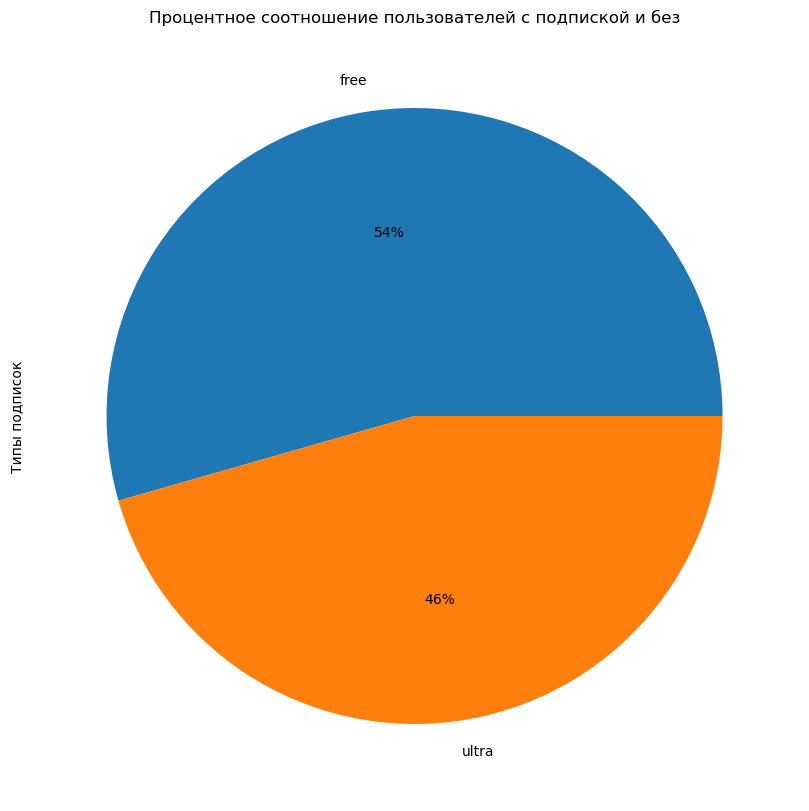

In [20]:
users['subscription_type'].value_counts().plot(kind='pie',
                                              autopct='%1.0f%%',
                                              figsize=[10,10],
                                              ylabel = 'Типы подписок',
                                              title = 'Процентное соотношение пользователей с подпиской и без');

46% пользователей с подпиской, остальные 54% без подписки.

##### Возраст пользователей:

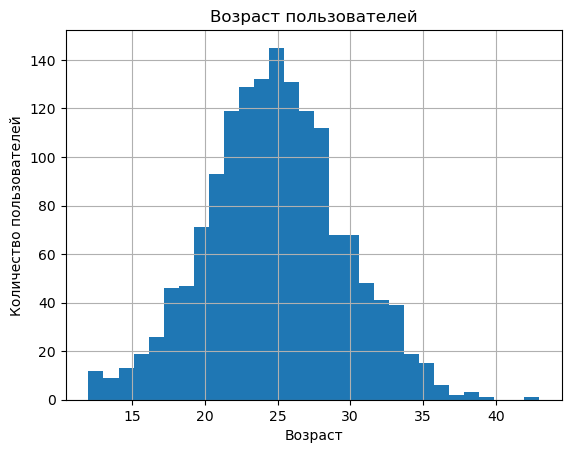

In [21]:
plt.hist(users['age'], bins = 30)
plt.title('Возраст пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.grid('True')
plt.show()

Средний возраст пользвателей - от 20 до 30 лет.

##### Расстояние, которое пользователь преодолел за одну поездку:

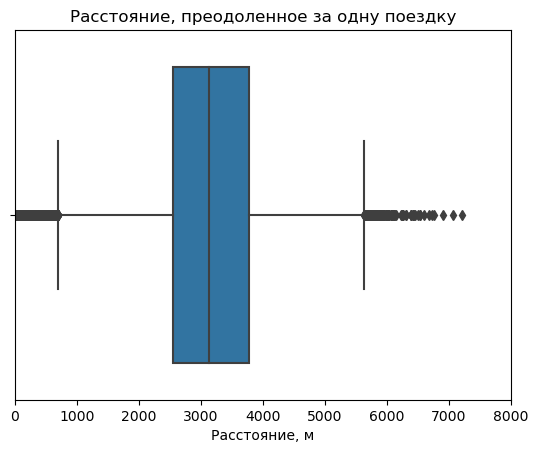

In [22]:
sns.boxplot(x=rides['distance'])
plt.title('Расстояние, преодоленное за одну поездку')
plt.xlabel('Расстояние, м')
plt.xlim(0, 8000);

Чаще всего пользователи берут самокат на поездку в 3 км.

##### Продолжительность поездок:

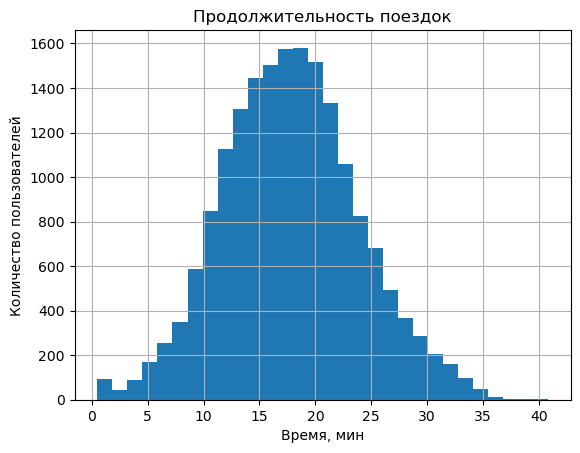

In [23]:
plt.hist(rides['duration'], bins = 30)
plt.title('Продолжительность поездок')
plt.xlabel('Время, мин')
plt.ylabel('Количество пользователей')
plt.grid('True')
plt.show()

В среднем пользователи арендуют самокат на 17 минут, виден второй пик, около 1 минуты.

#### Шаг 4. Объединение данных

##### Объединим данные о пользователях, поездках и подписках в один датафрейм:

In [24]:
data = users.merge(rides)
data = data.merge(subscriptions)
data

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


In [25]:
data_ultra = data[data['subscription_type'] == 'ultra']
data_ultra

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,3973.046497,24.671163,2021-08-29,8,6,0,199
6496,699,Оксана,22,Москва,ultra,3288.702563,15.892886,2021-09-12,9,6,0,199
6497,699,Оксана,22,Москва,ultra,3076.159348,14.389525,2021-09-26,9,6,0,199
6498,699,Оксана,22,Москва,ultra,4707.845501,15.839579,2021-10-17,10,6,0,199


##### Создадим два датафрейма с пользователями с подпиской и без:

In [26]:
data_free = data[data['subscription_type'] == 'free']
data_free

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


##### Визуализируем информацию о растоянии и времени поездок для пользователей обеих категорий:

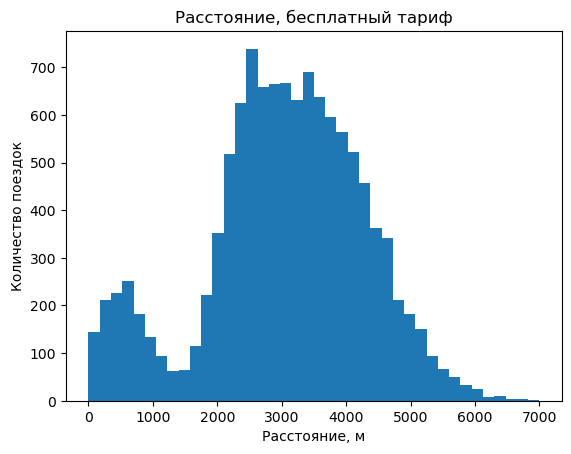

<Figure size 2000x2000 with 0 Axes>

In [27]:
plt.hist(data_free['distance'], bins=40, range = (0, 7000))
plt.title('Расстояние, бесплатный тариф')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество поездок')
plt.figure(figsize=(20,20))
plt.show()

 Видно два пика, первый около 600 м, второй от 2500 до 4000 м.

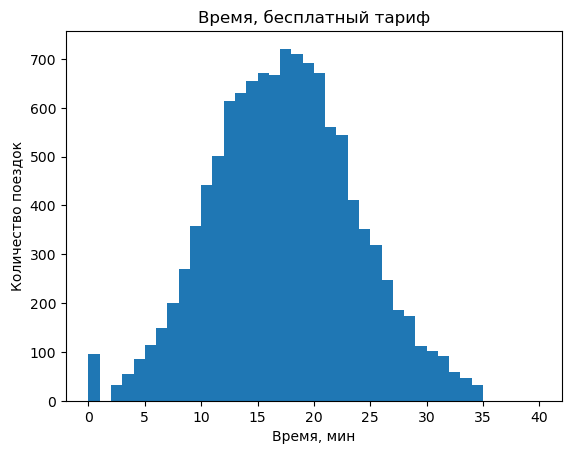

<Figure size 2000x2000 with 0 Axes>

In [28]:
plt.hist(data_free['duration'], bins=40, range = (0, 40))
plt.title('Время, бесплатный тариф')
plt.xlabel('Время, мин')
plt.ylabel('Количество поездок')
plt.figure(figsize=(20,20))
plt.show()

Видно два пика, один 1 мин, второй от 15 до 20 мин.

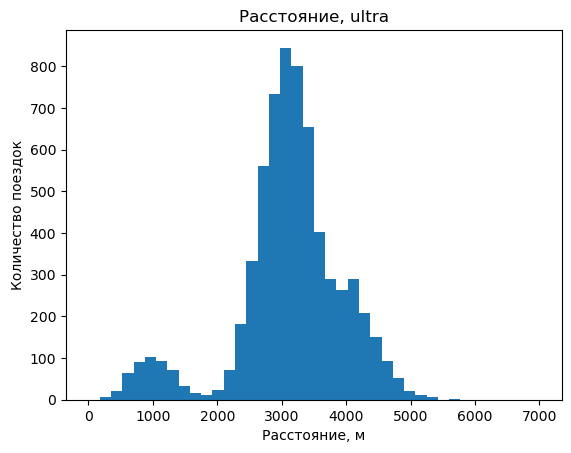

<Figure size 2000x2000 with 0 Axes>

In [29]:
plt.hist(data_ultra['distance'], bins=40, range = (0, 7000))
plt.title('Расстояние, ultra')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество поездок')
plt.figure(figsize=(20,20))
plt.show()

Видно два пика, первый 1 км, второй 3 км.

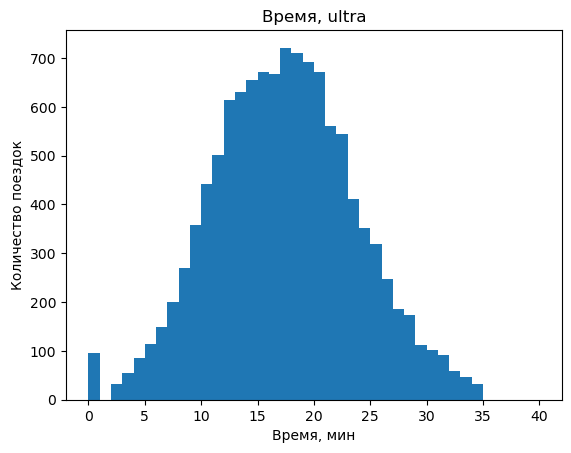

<Figure size 2000x2000 with 0 Axes>

In [30]:
plt.hist(data_free['duration'], bins=40, range = (0, 40))
plt.title('Время, ultra')
plt.xlabel('Время, мин')
plt.ylabel('Количество поездок')
plt.figure(figsize=(20,20))
plt.show()

Видно два пика, один 1 мин, второй от 15 до 22 мин.

#### Шаг 5. Подсчёт выручки

##### Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4:

In [31]:
data_agr = pd.pivot_table(data,
                index = ['month', 'user_id'],
                values = ['distance', 'name', 'duration', 'subscription_type'],
                aggfunc = {'distance': sum,
                          'name': len,
                          'duration': sum,
                          'subscription_type': min})

In [32]:
data_agr = data_agr.rename(columns={'name':'count'})

In [33]:
data_agr['duration'] = np.ceil(data_agr['duration'])

In [34]:
data_agr.head(10)

distance  duration  count subscription_type
month user_id                                                
1     1        7027.511294      42.0      2             ultra
      3        3061.777147      13.0      1             ultra
      5        3914.646990      13.0      1             ultra
      7        6478.080979      28.0      2             ultra
      12       3577.151148      33.0      1             ultra
      13       6687.987446      42.0      2             ultra
      14       7699.643820      34.0      2             ultra
      15       4187.621459      39.0      1             ultra
      20       3516.719208      29.0      1             ultra
      22       3058.692225      13.0      1             ultra

#####  В этот же датафрейм добавим столбец с помесячной выручкой, которую принёс каждый пользователь:

In [35]:
def money(row):
    if row['subscription_type'] == 'ultra':
        return (199 + row['duration'] * 6)
    else:
        return (50  * row['count'] + 8 * row['duration'])

In [36]:
data_agr['money_per_month'] = data_agr.apply(money, axis=1)

In [37]:
data_agr

distance  duration  count subscription_type  money_per_month
month user_id                                                                 
1     1        7027.511294      42.0      2             ultra            451.0
      3        3061.777147      13.0      1             ultra            277.0
      5        3914.646990      13.0      1             ultra            277.0
      7        6478.080979      28.0      2             ultra            367.0
      12       3577.151148      33.0      1             ultra            397.0
...                    ...       ...    ...               ...              ...
12    1525     4597.854350      34.0      1              free            322.0
      1526     3644.121544      23.0      1              free            234.0
      1528     3998.569324      11.0      1              free            138.0
      1532     6111.889853      41.0      2              free            428.0
      1534     2371.711192      16.0      1              free            178.0

[11331 rows x 5 columns]

#### Шаг 6. Проверка гипотез

##### Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании:

H_0: data_ultra['duration'] = data_free['duration']


H_1: data_ultra['duration'] > data_free['duration']

In [38]:
ultra = data_ultra['duration']
free = data_free['duration']

alpha = .05

results = st.ttest_ind(ultra, free, alternative='greater')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Ну удалость отвергнуть нулевую гипотезу')

Отвергаем нулевую гипотезу


Проверили гипотезу, отвергли гипотезу о том, что время поездки пользователей на тарифе ultra равно времени поездки пользователей на тарифе free.

##### Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? 

Проверим гипотезу: пользователи с подпиской проезжают расстояние, не превышающее 3130 метров за одну поездку.

H_0: data_ultra['distance'] = 3130

H_1: data_ultra['distance'] < 3130

In [39]:
ultra_dist = data_ultra['distance']

interested_value = 3130.0

alpha = .05

results = st.ttest_1samp(
    ultra_dist, 
    interested_value,
    alternative='less')    

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

Не удалось отвергнуть нулевую гипотезу


Проверили гипотезу, и мы не можем утверждать, что расстояние, которое проехали пользователи на тарифе ultra не превышает 3130 метров.

##### Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки:

H_0: data_agr.loc[data_agr['subscription_type'] == 'ultra', 'money_per_month'] == data_agr.loc[data_agr['subscription_type'] == 'free', 'money_per_month']

H_1: data_agr.loc[data_agr['subscription_type'] == 'ultra', 'money_per_month'] > data_agr.loc[data_agr['subscription_type'] == 'free', 'money_per_month']

In [40]:
ultra_per_mnth = data_agr.loc[data_agr['subscription_type'] == 'ultra', 'money_per_month'] 

free_per_mnth = data_agr.loc[data_agr['subscription_type']== 'free', 'money_per_month'] 


results = st.ttest_ind(ultra_per_mnth, 
                       free_per_mnth,
                       alternative = 'greater')

alpha = .05


if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

Отвергаем нулевую гипотезу


Проверили гипотезу, соответственно, мы можем утверждать, что выручка с пользователей на подписке ultra превышает выручку с пользователей на подписке free.

##### Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Будем использовать гипотезу о равенстве средних для зависимых (парных) выборок.

Гипотезы будут сформулированы так:
- H0 : μ1 = μ2
- H1 : μ1 != μ2

где μ1 и μ2 - средние значения количество обращений в техподдержку до и после изменения.

Метод, который нужно использовать при сравнении: scipy.stats.ttest_rel()

## Общий вывод:
Загрузили 3 датафрейма с информацией о пользователях, поездках и подписках.
Создали новый столбец с номером месяца, проверили наличие пропущенных значений, дубликатов в датафреймах, обработали.
Провели исследовательский анализ данных:
- Самый частовстречающийся город - Пятигорск, реже всего - Москва.
- 45.5% пользователей с подпиской, остальные 55.5% без подписки.
- Чаще всего пользователи берут самокат на поездку в 3 км, но есть и второй пик = ~1км.
- В среднем пользователи арендуют самокат на 17 минут, виден второй пик, около 1 минуты.

Объединили данные о пользователях, поездках и подписках в один датафрейм и создали еще два с информацией о пользователях с подпиской и без отдельно.
Создали датафрейм с агрегированными данными о поездках: суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц. В этот же датайрейм добавили столбец с помесячной выручкой.
Проверили гипотезы:

- Пользователи с подпиской тратят больше времени на поездки, чем пользователи на бесплатном тарифе-Отвергли нулевую гипотезу
- Пользователи с подпиской проезжают расстояние, не превышающее 3130 метров за одну поездку-Не удалось отвергнуть нулевую гипотезу
- Помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки-Отвергли нулевую гипотезу